# 图像处理

### 数据读取-图像

- cv2.IMREAD_COLOR 彩色图像
- cv2.IMREAD_GRAYSCALE 灰度图像

In [1]:
import cv2  # opencv 读取格式是bgr
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('7mvp.jpeg')

In [2]:
img

array([[[220, 176, 183],
        [238, 202, 208],
        [196, 180, 181],
        ...,
        [194, 186, 196],
        [207, 201, 212],
        [181, 177, 188]],

       [[224, 192, 197],
        [255, 237, 241],
        [255, 255, 254],
        ...,
        [255, 248, 255],
        [249, 246, 255],
        [204, 203, 212]],

       [[197, 191, 192],
        [253, 255, 255],
        [239, 255, 255],
        ...,
        [255, 254, 255],
        [248, 250, 251],
        [186, 190, 191]],

       ...,

       [[197, 196, 200],
        [247, 248, 252],
        [247, 251, 252],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [192, 192, 192]],

       [[193, 192, 196],
        [251, 250, 254],
        [255, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [192, 192, 192]],

       [[194, 191, 193],
        [196, 191, 193],
        [199, 190, 193],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]]

In [3]:
# 显示图像，也可以创建多个窗口
cv2.imshow('image', img)
# 等待时间，ms，如果为0表示按任意键消失
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img.shape

(25, 64, 3)

In [5]:
img = cv2.imread('7mvp.jpeg', cv2.IMREAD_GRAYSCALE)
img

array([[183, 208, 182, ..., 190, 205, 181],
       [197, 241, 255, ..., 251, 249, 206],
       [192, 255, 255, ..., 255, 250, 190],
       ...,
       [197, 249, 251, ..., 251, 251, 192],
       [193, 251, 255, ..., 250, 255, 192],
       [192, 192, 192, ..., 192, 192, 192]], dtype=uint8)

In [6]:
img.shape

(25, 64)

In [7]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 保存
cv2.imwrite('gray7mvp.jpeg', img)

True

In [9]:
type(img)

numpy.ndarray

In [10]:
img.size

1600

In [11]:
img.dtype

dtype('uint8')

### 数据读取-视频
- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可

In [19]:
video = cv2.VideoCapture("./test.flv")

In [20]:
# 检查是否打开正确
if video.isOpened():
    open, frame = video.read()
else:
    open = False

In [21]:
while open:
    ret, frame = video.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break
video.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [23]:
img = cv2.imread('7mvp.jpeg')
split = img[0:10, 0:30]
cv2.imshow('result', split)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 颜色通道提取

In [24]:
b,g,r = cv2.split(img)

In [27]:
g

array([[176, 202, 180, ..., 186, 201, 177],
       [192, 237, 255, ..., 248, 246, 203],
       [191, 255, 255, ..., 254, 250, 190],
       ...,
       [196, 248, 251, ..., 251, 251, 192],
       [192, 250, 254, ..., 250, 255, 192],
       [191, 191, 190, ..., 192, 192, 192]], dtype=uint8)

In [28]:
g.shape

(25, 64)

In [30]:
# 合并通道
img = cv2.merge((b,g,r))
img.shape

(25, 64, 3)

In [31]:
# 只保留r通道
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv2.imshow('result', cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
# 只保留b通道
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv2.imshow('result', cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
# 只保留g通道
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv2.imshow('result', cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 边界填充

In [40]:
top_size, bottom_size,left_size,right_size=(10,10,10,10)
replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

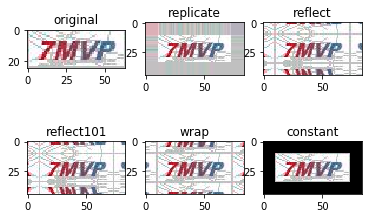

In [41]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')

plt.show()

- BORDER_REPLICATE: 复制法，也就是复制最边缘像素
- BORDER_REFLECT: 反射法，对感兴趣的图像中的像素在两边进行复制，例如： fedcba|abcdefgh|hgfedbca
- BORDER_REFLECT_101: 反射法, 也就是以最边缘像素为轴，对称, gfedcb|abcdefgh|gfedcba
- BORDER_WRAP: 外包装法 cdefgh|abcdefgh|abcdefg
- BORDER_CONSTANT: 常量法，常数值填充

### 数值填充

In [42]:
img_7mvp = cv2.imread('7mvp.jpeg')
img_edct = cv2.imread('edct.jpeg')

In [44]:
img_7mvp2 = img_7mvp + 10
img_7mvp[:5, :5, 0]

array([[220, 238, 196, 188, 196],
       [224, 255, 255, 185, 225],
       [197, 253, 239, 234, 196],
       [178, 189, 222, 217, 237],
       [188, 224, 151, 174, 241]], dtype=uint8)

In [45]:
img_7mvp2[:5,:5,0]

array([[230, 248, 206, 198, 206],
       [234,   9,   9, 195, 235],
       [207,   7, 249, 244, 206],
       [188, 199, 232, 227, 247],
       [198, 234, 161, 184, 251]], dtype=uint8)

In [47]:
# 超过255会返回  % 256  的余数
(img_7mvp + img_edct)[:5, :, 0]

array([[132, 174, 143, 134, 171, 129, 116,  91, 106, 114, 135, 142, 126,
        128,  90, 121, 125, 131, 104,  90, 100, 112, 139, 144, 128, 116,
         86, 115, 155, 159, 105, 122, 143, 133, 128, 109, 131, 139, 107,
        121, 115, 110, 148, 101, 137, 115, 117, 107, 110, 132, 120, 132,
        114, 104, 106, 126, 136, 125, 133, 130, 119, 116, 150, 103],
       [126, 226, 254, 184, 224, 245, 166, 183, 212, 238, 241, 247, 245,
        232, 238, 211, 196, 243, 228, 170, 159, 236, 254, 254, 250, 221,
        237, 247, 251, 191, 212, 168, 242, 233, 242, 218, 231, 247, 247,
        250, 234, 218, 229, 247, 249, 240, 229, 223, 245, 235, 233, 227,
        241, 192, 235, 224, 242, 235, 245, 246, 249, 247, 233, 134],
       [124, 234, 230, 233, 195, 179, 212, 182, 142, 194, 232, 206, 227,
        237, 237, 186, 248, 254, 248, 249, 244, 198, 159, 176, 188, 171,
        249, 179, 143, 191, 252, 201, 213, 228, 232, 240, 245, 237, 247,
        239, 218, 239, 245, 252, 245, 252, 245, 244, 254, 2

In [48]:
## cv2中add方法不会取余，如果大于255,则取255
cv2.add(img_7mvp, img_edct)[:5, :, 0]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

### 图像融合

In [49]:
img_7mvp + img_edct

array([[[132, 122, 118],
        [174, 157, 154],
        [143, 113, 115],
        ...,
        [116, 114, 129],
        [150, 151, 165],
        [103, 106, 120]],

       [[126, 124, 118],
        [226, 226, 223],
        [254, 253, 252],
        ...,
        [247, 245, 254],
        [233, 235, 245],
        [134, 138, 148]],

       [[124, 141, 134],
        [234, 254, 247],
        [230, 251, 249],
        ...,
        [251, 251, 250],
        [246, 249, 248],
        [128, 133, 132]],

       ...,

       [[143, 140, 143],
        [245, 247, 247],
        [242, 250, 250],
        ...,
        [193, 193, 193],
        [198, 198, 198],
        [120, 120, 120]],

       [[127, 123, 123],
        [250, 249, 250],
        [250, 253, 251],
        ...,
        [181, 181, 181],
        [188, 188, 188],
        [132, 132, 132]],

       [[135, 128, 125],
        [134, 129, 125],
        [133, 128, 126],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]

In [50]:
img_7mvp.shape

(25, 64, 3)

In [51]:
img_edct.shape

(25, 64, 3)

In [52]:
# 如果两张图片shape不一样，可以使用resize方法
img_edct = cv2.resize(img_edct, (64, 25))

In [53]:
img_edct.shape

(25, 64, 3)

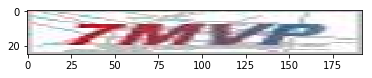

In [54]:
res = cv2.resize(img, (0, 0), fx=3, fy=1)
plt.imshow(res)

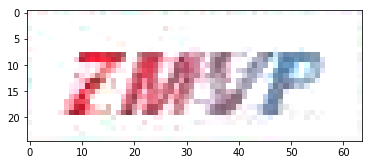

In [58]:
# 公式 res = ax + by + c
res = cv2.addWeighted(img_7mvp, 0.9, img_edct, 0.4, 0)
plt.imshow(res)

### 图像阈值

#### res, dst = dv2.threshold(src, thresh, maxval, type)
- src: 输入图，只能输入单通道图像，通常来说为灰度图
- dst: 输出图
- thresh: 阈值
- maxval: 当像素超过了阈值(或者小于阈值，根据type来决定)，所赋予的至
- type: 二值化操作的类型，包含一下5种类型
    - cv2.THRESH_BINARY, 超过阈值部分去maxval最大值，否则取0
    - cv2.THRESH_BINARY_INV，BINARY的反转
    - cv2.THRESH_THRESH_TRUNC, 超过阈值的部分设为阈值，否则不变
    - cv2.THRESH_TOZERO，超过阈值的部分不改变，否则设为0
    - cv2.THRESH_TOZERO_INV，TOZERO的反转

In [63]:
img_7mvp[:5, :5, ]

array([[[220, 176, 183],
        [238, 202, 208],
        [196, 180, 181],
        [188, 186, 185],
        [196, 205, 202]],

       [[224, 192, 197],
        [255, 237, 241],
        [255, 255, 254],
        [185, 192, 189],
        [225, 239, 235]],

       [[197, 191, 192],
        [253, 255, 255],
        [239, 255, 255],
        [234, 255, 255],
        [196, 216, 211]],

       [[178, 186, 185],
        [189, 206, 203],
        [222, 254, 249],
        [217, 251, 245],
        [237, 255, 254]],

       [[188, 202, 200],
        [224, 245, 242],
        [151, 185, 179],
        [174, 206, 201],
        [241, 255, 255]]], dtype=uint8)

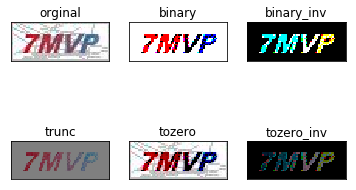

In [66]:
ret, thresh1 = cv2.threshold(img_7mvp, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_7mvp, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_7mvp, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_7mvp, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_7mvp, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['orginal', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
images = [img_7mvp,thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1),
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),
    plt.yticks([])
    
plt.show()